# Real-world Data Science: Applications of Visualization
## Qinyu Chen

In [71]:
# setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import 

## 1 EDA

In [59]:
data = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")

In [60]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [62]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


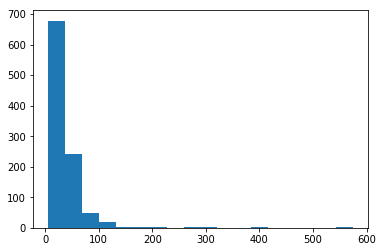

In [73]:
plt.hist(data["price"], bins=18)
plt.show()

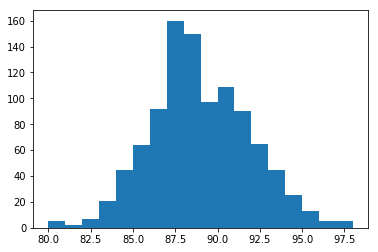

In [74]:
plt.hist(data["points"], bins=18)
plt.show()

## 2 Data Preprocessing

In [63]:
# id is not related; designation, region_2,taster_twitter_handle too many nan
data = data.drop(columns = ['Unnamed: 0','region_2','designation','taster_twitter_handle'])
data = data.drop_duplicates()
data = data.dropna()
data = data.reset_index(drop=True)

In [64]:
# try
data = data.sample(n=1000)
data = data.reset_index(drop=True)

In [65]:
data.shape

(1000, 10)

In [66]:
data.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery
0,Australia,This is the midlevel entry in Yalumba's Shiraz...,86,19.0,South Australia,Eden Valley,Joe Czerwinski,Yalumba 2008 Shiraz-Viognier (Eden Valley),Shiraz-Viognier,Yalumba
1,US,This is the first time this recently purchased...,91,60.0,Oregon,Willamette Valley,Paul Gregutt,Elk Cove 2014 Goodrich Pinot Noir,Pinot Noir,Elk Cove
2,US,"This easy-to-drink appellation blend, which is...",92,40.0,California,Sta. Rita Hills,Matt Kettmann,Weatherborne 2015 Pinot Noir (Sta. Rita Hills),Pinot Noir,Weatherborne
3,US,"While intensely ripe on the nose, this beautif...",90,27.0,New York,North Fork of Long Island,Anna Lee C. Iijima,Martha Clara 2014 Northville Red (North Fork o...,Bordeaux-style Red Blend,Martha Clara
4,US,"A blend sourced from the Steinhauer, Bancroft ...",93,170.0,California,Napa Valley,Virginie Boone,Beringer 2013 Private Reserve Cabernet Sauvign...,Cabernet Sauvignon,Beringer


In [67]:
data.dtypes

country         object
description     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
dtype: object

In [69]:
# cat: country, province, region_1, taster_name, title, variety, winery
# text: description
# quant: points, price


# one-hot encoding for cate 
data_cat = data[["country","province","region_1","taster_name","title","variety","winery"]]
data_cat = pd.get_dummies(data_cat)
data_cat.head()

,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,province_Alsace,province_Andalucia,province_Australia Other,...,winery_Yalumba,winery_Yellow Tail,winery_Yohan Lardy,winery_Youngberg Hill Vineyards,winery_ZaHa,winery_Zonin,winery_Zonte's Footstep,winery_Zuccardi,winery_Zynthesis,winery_Écluse
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# TF-IDF for text


# remove stop words, tokenization, stem, 

import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

data['description'].fillna('unknown', inplace=True)


# preprocessing text
stopwords = []
with open('stopwords_english.txt') as fsw:
    for word in fsw.readlines():
        word = word.strip('\n')
        stopwords.append(word)
fsw.close()

def preprocess_text(text):
    text = text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    text = text.apply(lambda x: " ".join(x.strip() for x in str(x).split()))
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace('\d+', '')
    text = text.apply(lambda x: " ".join([word for word in str(x).split() if word not in (stopwords)]))
    text = text.astype(str)
    return text

data['description'] = preprocess_text(data['description'])


# stem
ps = nltk.stem.PorterStemmer()
def stem(text):
    text = text.apply(lambda x: " ".join([ps.stem(x) for x in str(x).split()]))
    return text

data['description'] = stem(data['description'])

# TF-IDF



In [76]:
data.head

<bound method NDFrame.head of        country                                        description  points  \
0    Australia  midlevel entri yalumba shirazviogni rang slot ...      86   
1           US  first time recent purchas vineyard featur elk ...      91   
2           US  easytodrink appel blend john sebastiano vineya...      92   
3           US  intens ripe nose beauti balanc bordeauxstyl bl...      90   
4           US  blend sourc steinhauer bancroft ranch st helen...      93   
5           US  rich layer raspberri bright cherri fullbodi gr...      88   
6           US  quit fruiti fairli rich mediumbodi wine plenti...      86   
7    Australia  complex rich weighti chardonnay avoid overt fr...      90   
8           US  overt butter aroma flavor give mediumbodi wine...      86   
9       France  pale sunset color light raspberri flavor fresh...      85   
10      France  fruiti structur wine dens darkhu black currant...      88   
11      France  indic particularli rich wine m

In [ ]:
# Split train test

X_train, X_test, y_train, y_test = train_test_split(data_preprocessed, label_cat, test_size=0.2, random_state=0)

In [ ]:
# normalize quant



## 3 ML